# CASO DE ESTUDIO 1
*Case of study 1*

## Data fetching

### Gastos

In [353]:
import pandas as pd

gastos = pd.read_csv('CasoMarketing-Gasto.csv')
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Semana          48 non-null     int64 
 1   GastoAdwords    48 non-null     object
 2   GastoFacebook   48 non-null     object
 3   GastoInstagram  48 non-null     object
 4   GastoOrganico   48 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


In [354]:
gastos.head()

,Semana,GastoAdwords,GastoFacebook,GastoInstagram,GastoOrganico
0,1,"$58,587.80","$13,166.12","$25,644.37",$0.00
1,2,"$67,295.35","$15,130.57","$25,603.19",$0.00
2,3,"$43,330.19","$14,983.00","$28,962.36",$0.00
3,4,"$60,818.66","$14,294.78","$29,601.45",$0.00
4,5,"$43,593.73","$18,685.01","$29,219.29",$0.00


| **Column name** | **Feature description** |
|----------------:| :--------------------- |
| *Semana*        | Week of the data |
| *GastoAdwords*  | Google advertisement cost |
| *GastoFacebook* | Facebook avertisement cost |
| *GastoInstagram*| Intsgram advertisement cost |
| *GastoOrganico* | Company's page cost |

The table must be cleaned and processed.

In [355]:
gastos.drop('GastoOrganico', axis=1, inplace=True) # description specifies it is always 0

to_float = lambda x: float(x.replace(',', '').replace('$', '')) if isinstance(x, str) else x
gastos = gastos.applymap(to_float)
gastos.columns = [x.replace('Gasto', '') for x in list(gastos.columns)]
gastos.head()

,Semana,Adwords,Facebook,Instagram
0,1,58587.80,13166.12,25644.37
1,2,67295.35,15130.57,25603.19
2,3,43330.19,14983.00,28962.36
3,4,60818.66,14294.78,29601.45
4,5,43593.73,18685.01,29219.29


## Operaciones

All the prospects obtained from marketing

In [356]:
ops = pd.read_csv('CasoMarketing-Operaciones.csv')
ops.head()

,Prospecto,Semana,Verificado,Oe,PrioridadProspecto,Canal
0,1,1,Si,6.0,Prioridad Alta,Organico
1,2,1,No,NaN,Prioridad Alta,Organico
2,3,1,Si,5.0,Prioridad Alta,Facebook
3,4,1,Si,14.0,Prioridad Alta,AdWords
4,5,1,Si,14.0,Prioridad Alta,AdWords


| **Column name** | **Feature description** |
|----------------:| :--------------------- |
| *Prospecto*     | Prospect ID |
| *Semana*        | Week of the data |
| *Verificado*    | Wether the prospect provided his/her card information. It is the main KPI with which the marketing meassures new subscriptions |
| *Oe*            | Time (in days) between account opening and prospect verification |
| *PriodidadProspecto* | Priority level of the prospect based on a ML algorithm predicting the probability of the prospect becoming verified|
| *Canal*         | Where did the costumer came from |

The table must be cleaned and processed.

In [357]:
for column in list(ops.columns)[2:]:
    print(ops[column].unique())

['Si' 'No']
[ 6. nan  5. 14. 15. 20.  4.  1.  9.  2. 17.  3.  7. 11.  8. 16. 18. 10.
 21. 13. 12. 19.]
['Prioridad Alta' 'Prioridad Baja' 'Prioridad Media']
['Organico' 'Facebook' 'AdWords' 'Instagram']


In [358]:
ops['Oe'].fillna(-1, inplace=True) # Costrumers that never opened the account, number of days is irelevant but cant be left undefinded

In [359]:
ops.shape[0]==len(ops['Prospecto'].unique()) # Check for repeated users (True if all unique)

True

In [360]:
ops.drop('Prospecto', axis=1, inplace=True) # There is no value for individual identifiers
ops['Oe'] = ops['Oe'].apply(lambda x: int(x))
ops.head()

,Semana,Verificado,Oe,PrioridadProspecto,Canal
0,1,Si,6,Prioridad Alta,Organico
1,1,No,-1,Prioridad Alta,Organico
2,1,Si,5,Prioridad Alta,Facebook
3,1,Si,14,Prioridad Alta,AdWords
4,1,Si,14,Prioridad Alta,AdWords


## Join the tables

In [361]:
data = ops.merge(gastos, on='Semana', how='inner')

In [362]:
data['Gasto'] = data.apply(lambda row: row[row['Canal']] if row['Canal'] in ['Facebook', 'Instagram', 'Adwords'] else 0, axis=1)
data.sample(3)

,Semana,Verificado,Oe,PrioridadProspecto,Canal,Adwords,Facebook,Instagram,Gasto
5666,30,Si,6,Prioridad Alta,Facebook,94430.35,28118.15,71832.84,28118.15
875,7,Si,2,Prioridad Alta,Instagram,51000.52,18944.57,32865.13,32865.13
5029,27,Si,3,Prioridad Alta,Instagram,94314.08,32440.69,59235.26,59235.26


# Analysis

The MAE will be made by splitting into 3 different scenarios:
    - The market efforts achieved to capure the user and an account was made. An analysis will be me into the depths of why that happened.
    - The marketing team missed the possible client and the data will what patterns can be made in that group.
    - A contrast between the two groups.

In [363]:
import seaborn as sea
import matplotlib.pyplot as plt

sea.set_theme()
sea.set_context("paper")
sea.axes_style("darkgrid");

<Axes: xlabel='Semana'>

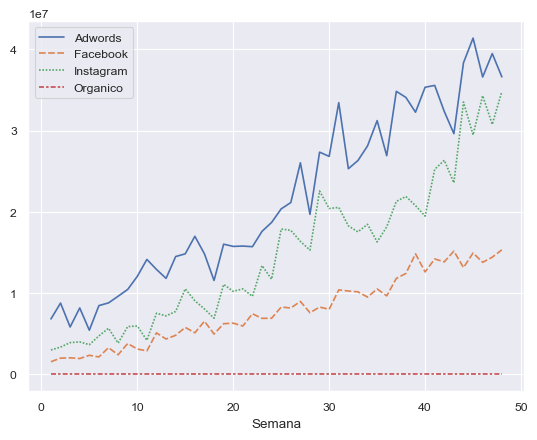

In [364]:
expenses_per_week = data.groupby(['Semana']).sum().iloc[:, -4:-1]
expenses_per_week['Organico'] = 0
sea.lineplot(expenses_per_week)

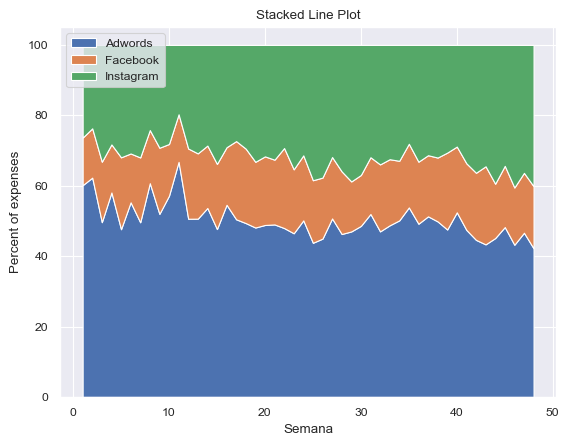

In [365]:
expenses_per_week['total'] = expenses_per_week.sum(axis=1)
for col in expenses_per_week.columns[:-2]:
    expenses_per_week[col] /= (expenses_per_week['total']/100)
expenses_per_week.drop(['total', 'Organico'], axis=1, inplace=True)
    
plt.stackplot(range(1, 49), expenses_per_week['Adwords'], expenses_per_week['Facebook'], expenses_per_week['Instagram'], labels=['Adwords','Facebook','Instagram'])

plt.legend(loc='upper left')
plt.title('Stacked Line Plot')
plt.xlabel('Semana')
plt.ylabel('Percent of expenses')

plt.show()

<Axes: xlabel='Semana'>

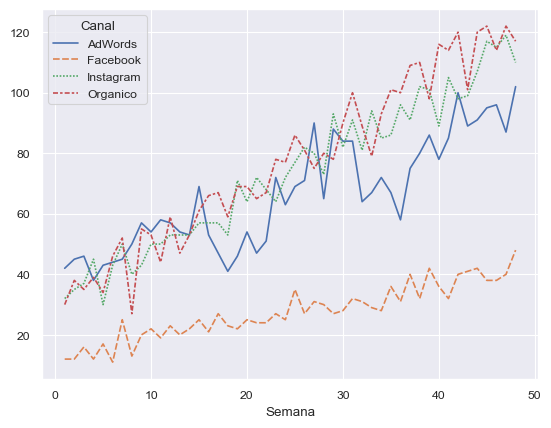

In [366]:
users_per_week = data.groupby(['Semana', 'Canal']).size()
users_per_week = users_per_week.unstack(level='Canal')
users_per_week.reset_index(inplace=True)
users_per_week.set_index('Semana', inplace=True)
sea.lineplot(users_per_week)

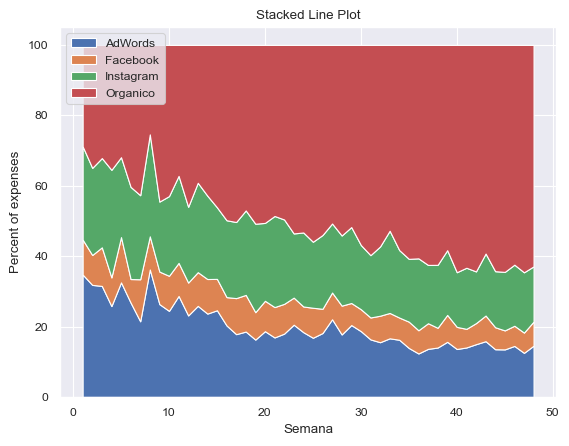

In [369]:
users_per_week['total'] = users_per_week.sum(axis=1)
for col in users_per_week.columns[:-1]:
    users_per_week[col] /= (users_per_week['total']/100)
users_per_week.drop('total', axis=1, inplace=True)
    
plt.stackplot(range(1, 49), users_per_week['AdWords'], users_per_week['Facebook'], users_per_week['Instagram'], users_per_week['Organico'],
              labels=['AdWords','Facebook','Instagram', 'Organico'])

plt.legend(loc='upper left')
plt.title('Stacked Line Plot')
plt.xlabel('Semana')
plt.ylabel('Percent of expenses')

plt.show()